In [ ]:
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from dqn_agent import Agent
from unityagents import UnityEnvironment

In [2]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    env = UnityEnvironment(file_name="Banana_windows_x86_64/Banana.exe")
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    agent = Agent(state_size=37, action_size=4, seed=0)

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)              # select an action
            env_info = env.step(int(action))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step            
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {0:5d}\tAverage Score: {1:5.2f}\tt: {2:5d}'.format(i_episode, np.mean(scores_window), t), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {:5d}\tAverage Score: {:5.2f}\t           '.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:5d} episodes!\tAverage Score: {:5.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    env.close()
    return scores

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode   100	Average Score:  0.57	           
Episode   200	Average Score:  3.85	           
Episode   300	Average Score:  7.08	           
Episode   400	Average Score:  9.17	           
Episode   500	Average Score: 11.98	           
Episode   527	Average Score: 13.03	t:   299
Environment solved in   427 episodes!	Average Score: 13.03


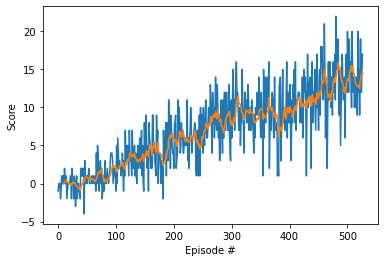

In [3]:
scores = dqn(n_episodes=1000, max_t=300)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
rolling_mean = pd.Series(scores).rolling(10).mean()
plt.plot(rolling_mean)
plt.show()